In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from csv and add to dat 
dat = pd.read_csv("titanic_dataset.csv")

In [3]:
#drop unnecessary columns from data
dat = dat.drop(['PassengerId', 'Cabin', 'Embarked', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare' ], axis = 1)

In [4]:
#show summary of data
round(dat.describe(),2)

,Survived,Pclass,Age
count,891.00,891.00,714.00
mean,0.38,2.31,29.70
std,0.49,0.84,14.53
min,0.00,1.00,0.42
25%,0.00,2.00,20.12
50%,0.00,3.00,28.00
75%,1.00,3.00,38.00
max,1.00,3.00,80.00


In [5]:
#check for null values
dat.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [6]:
#determine median age to fill null
median_age = dat['Age'].median()

In [7]:
#fill null age values with the median of ages
dat['Age'] = dat['Age'].fillna(median_age)

In [8]:
#verify null values are filled
dat.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

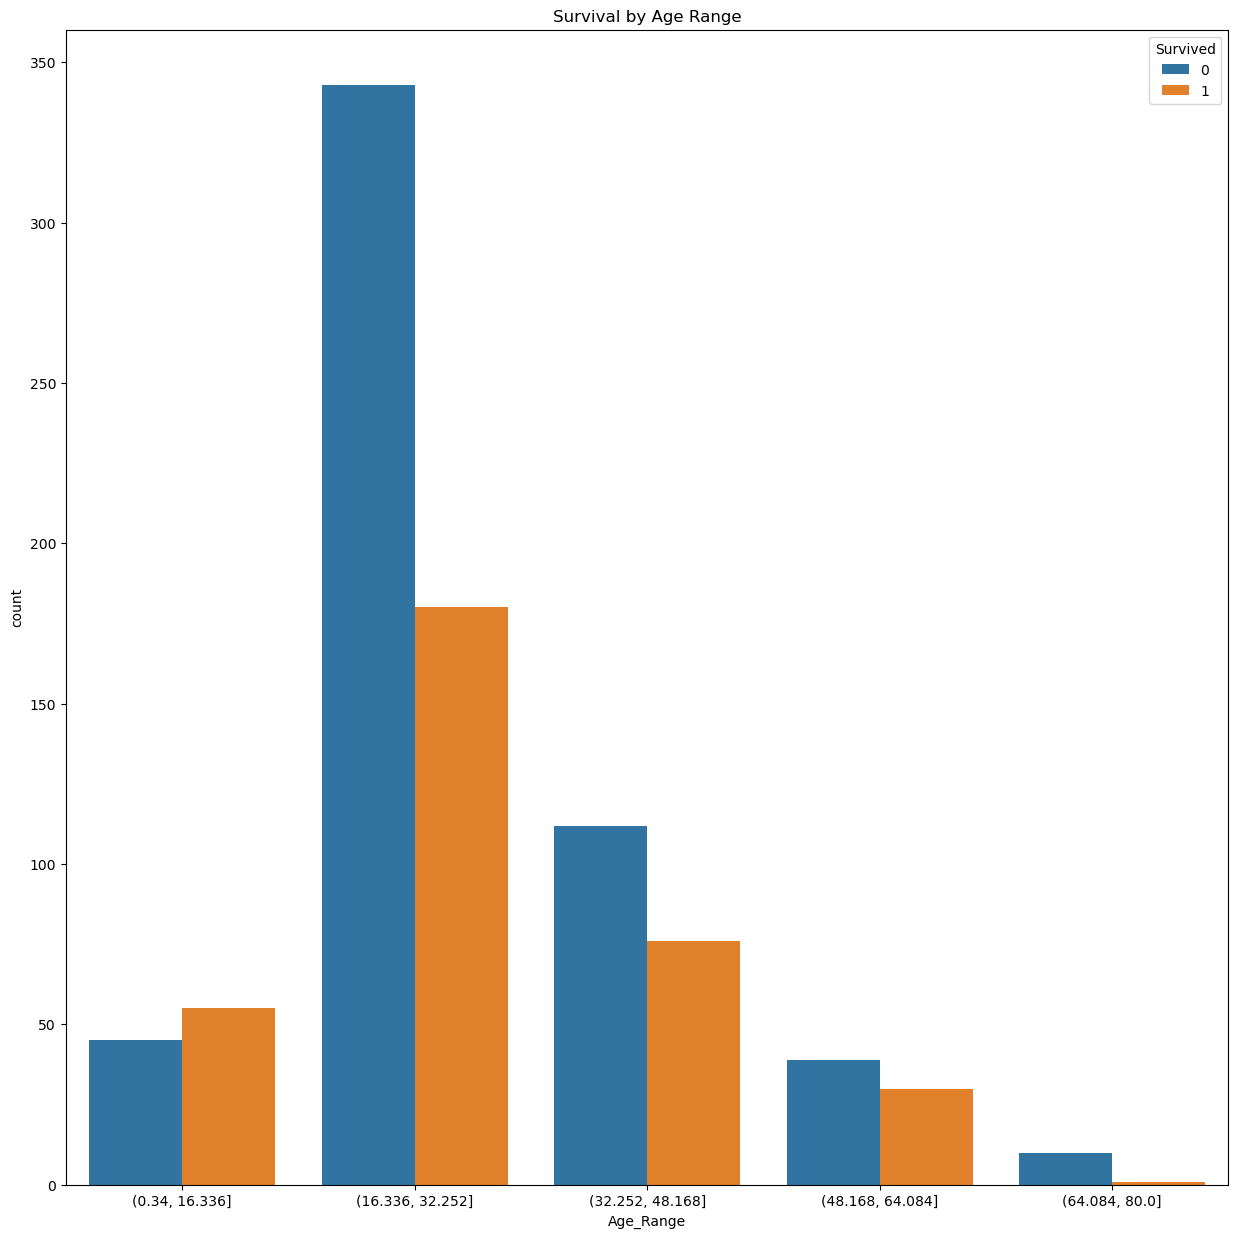

In [9]:
#prep countplot to display age ranges and their survival counts
plt.figure(figsize = (15,15))
plt.title('Survival by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of People')
#cut age into 5 pieces to create ranges
dat['Age_Range'] = pd.cut(dat['Age'], 5)
sns.countplot(x= dat['Age_Range'], hue = dat['Survived'])
plt.savefig('Survival by Age.png')
plt.show()

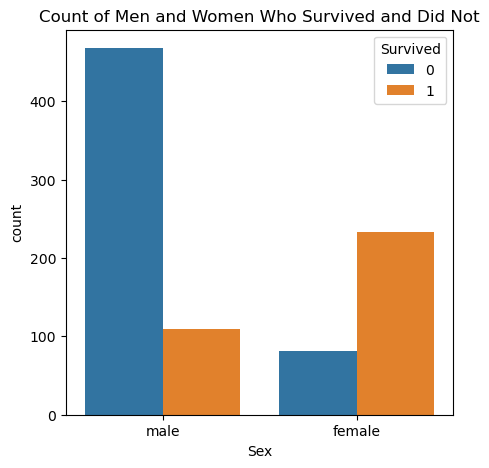

In [10]:
#plot countplot to visualize the difference in survivalcounts between men and women
plt.figure(figsize = (5,5))
plt.title('Count of Men and Women Who Survived and Did Not')
sns.countplot(x= dat['Sex'], hue = dat['Survived'])
plt.savefig('Countplot by Sex.png')

In [11]:
#change Sex data type to category so that it can be used in correlation heat map
dat['Sex'] = dat['Sex'].astype('category').cat.codes

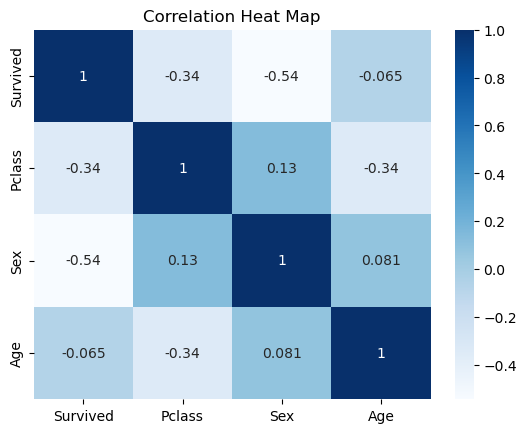

In [12]:
#create heat map
plt.title('Correlation Heat Map')
sns.heatmap(dat.corr(), annot = True, cmap= 'Blues')
plt.savefig('Correltaion Heat Map.png')

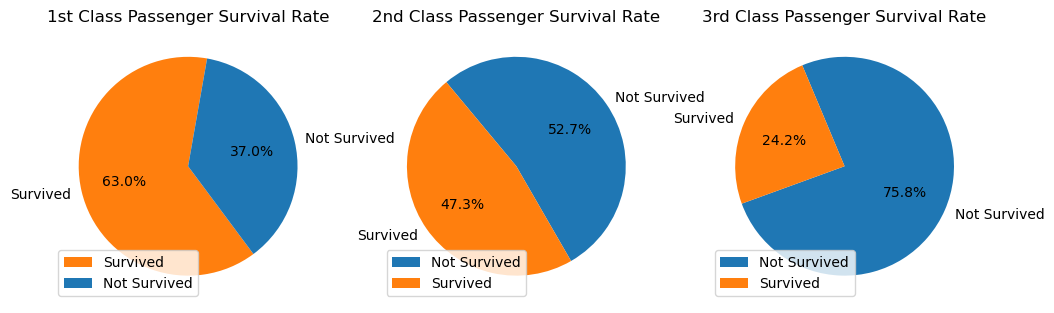

In [13]:
#plot pie charts to display the survival percentages for each passenger class
plt.figure (figsize = (12,12))
plt.subplot(1, 3, 1)
first = dat[dat['Pclass'] == 1] #created a dataframe with only 1st class
plt.pie(first['Survived'].value_counts().values, labels = ['Survived','Not Survived'] ,autopct='%1.1f%%',colors=['tab:orange', 'tab:blue'], startangle=80)
plt.title('1st Class Passenger Survival Rate')
plt.legend(labels = ['Survived', 'Not Survived'], loc='lower left')

plt.subplot(1,3,2)
second = dat[dat['Pclass'] == 2] #created a dataframe with only 2nd class
plt.pie(second['Survived'].value_counts().values, labels = ['Not Survived','Survived'],autopct='%1.1f%%', startangle=300)
plt.title('2nd Class Passenger Survival Rate')
plt.legend(labels = ['Not Survived', 'Survived'], loc='lower left')

plt.subplot(1,3,3)
third = dat[dat['Pclass'] == 3] #created a dataframe with only 3rd class
plt.pie(third['Survived'].value_counts().values, labels = ['Not Survived','Survived'],autopct='%1.1f%%', startangle=200)
plt.title('3rd Class Passenger Survival Rate')
plt.legend(labels = ['Not Survived', 'Survived'], loc='lower left')
plt.savefig('Pie Charts by Class.png')

In [14]:
#Getting the total number of male and female passengers
#And getting the total number of male and female survivors
sex_count = dat.groupby('Sex')['Sex'].count()
survived_sex = dat.groupby('Sex')['Survived'].sum()
print(sex_count)
print(survived_sex)

Sex
0    314
1    577
Name: Sex, dtype: int64
Sex
0    233
1    109
Name: Survived, dtype: int64


In [15]:
#Calcilating the survival rate of each sex
Survival_rates_by_sex = survived_sex/sex_count
Survival_rates_by_sex

Sex
0    0.742038
1    0.188908
dtype: float64

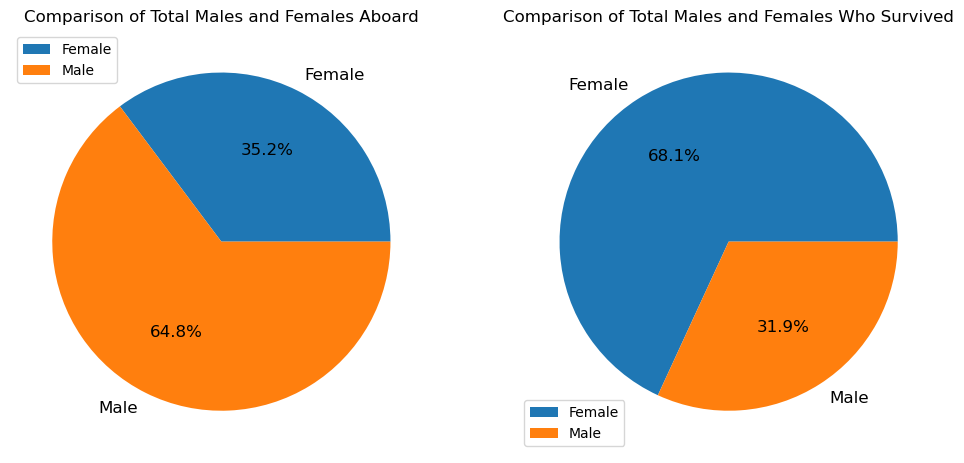

In [16]:
#Creating the pie charts to show the breakdown of passengers by sex
#And to show the breakdown of survivors by sex
plt.figure (figsize = (12,12))
plt.subplot(1, 2, 1)
plt.title('Comparison of Total Males and Females Aboard')
plt.pie(sex_count.values, labels=['Female', 'Male'], 
 autopct='%1.1f%%', textprops={'fontsize':12})
plt.legend(labels = ['Female', 'Male'], loc='upper left')

plt.subplot(1,2,2)
plt.title('Comparison of Total Males and Females Who Survived')
plt.pie(survived_sex.values, labels=['Female', 'Male'], 
 autopct='%1.1f%%', textprops={'fontsize':12})
plt.legend(labels = ['Female', 'Male'], loc='lower left')
plt.savefig('Pie Charts By Sex.png')
plt.show()